In [63]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

<b> Assignment 6: </b> Implement an optimum global thresholding algorithm (Otsu’s Method) to
segment an object in an image.

In [64]:
image = Image.open("DIP3E_Original_Images_CH10/Fig1039(a)(polymersomes).tif")
img = np.asarray(image)

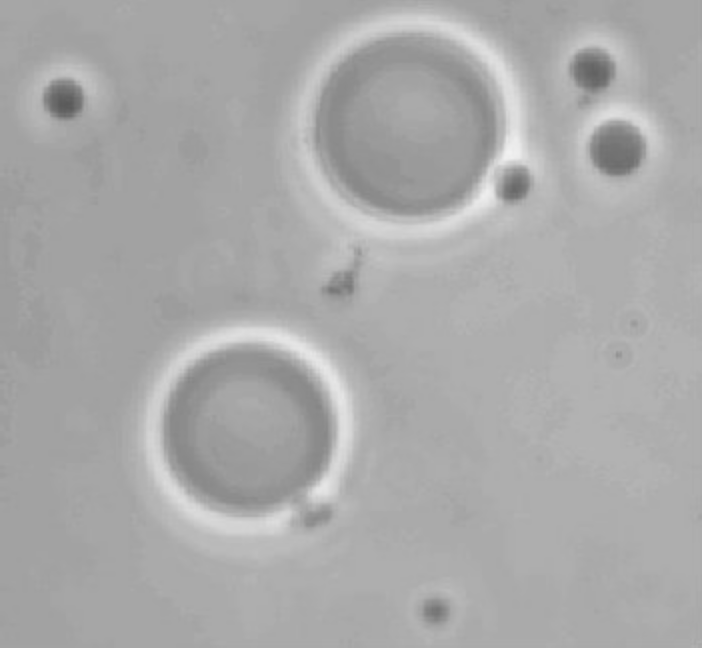

In [65]:
image

<h1> Optimum Global Thresholding using OTSU's Method </h1>

Dimensions : ( 648 , 702 ), Max. Pixel Value : 241


(array([   533.,   1957.,   2044.,  21795., 140329., 236882.,  29064.,
         13826.,   7280.,   1186.]),
 array([ 90. , 105.1, 120.2, 135.3, 150.4, 165.5, 180.6, 195.7, 210.8,
        225.9, 241. ]),
 <BarContainer object of 10 artists>)

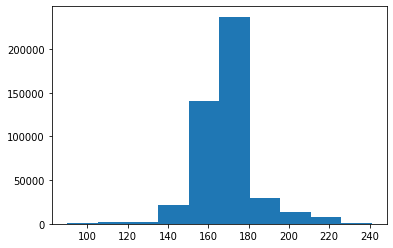

In [66]:
M = img.shape[0]
N = img.shape[1]
L = np.max(img)
print("Dimensions :", "(", M, ",", N, "), Max. Pixel Value :",  L)

p = np.zeros(L + 1)
for i in range(M) :
    for j in range(N) :
        p[img[i][j]] += 1
        
for i in range(L + 1) :
    p[i] /= M * N

#hisogram of pixel values
z = img.flatten()
plt.hist(z)

In [67]:
sigma_max = -1
k_max = -1
for k in range(L + 1) :
    P1 = np.sum(p[:k])
    P2 = np.sum(p[k:])
    m1 = np.sum(np.array([i for i in range(k)]) * p[:k]) / P1
    m2 = np.sum(np.array([i for i in range(k, L + 1)]) * p[k:]) / P2
    #global mean calculation
    mg = (m1 * P1) + (m2 * P2)
    #This parameter has to be maximized to find the optimum thresholding value
    sigma_B = (P1 * ((m1 - mg) ** 2)) + (P2 * ((m2 - mg) ** 2))
    if sigma_B > sigma_max :
        sigma_max = sigma_B
        k_max = k

<ipython-input-67-7727008f2f53>:7: RuntimeWarning: invalid value encountered in double_scalars
  m1 = np.sum(np.array([i for i in range(k)]) * p[:k]) / P1


In [68]:
k_max

182

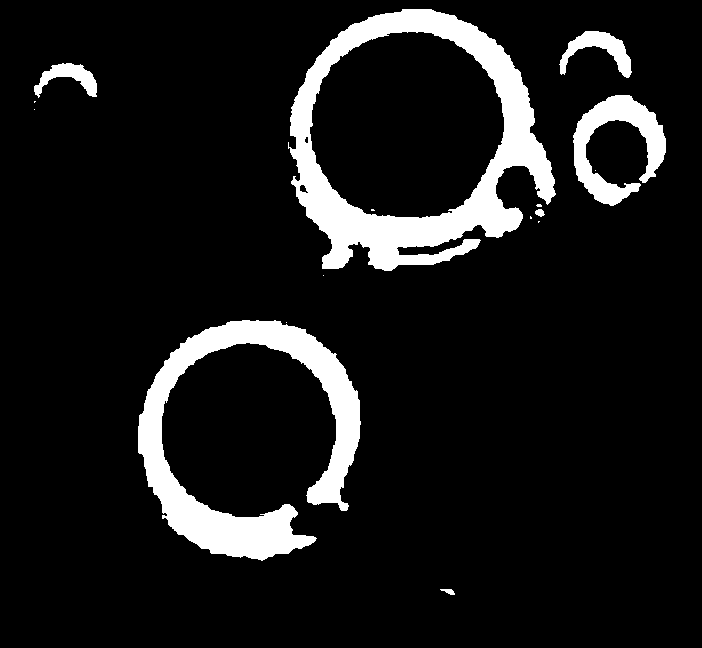

In [69]:
img = (img > k_max)
Image.fromarray(img)

<h3> Analysis </h3>

The intensity difference between the background and objects is small, normal thresholding failed to achieve the desired segmentation. The figure shows the result obtained using Otsu’s method.